<h1><center> Exploring Machine Learning Algorithims </h1>
    <h3><center> Goal of Notebook: </h3>
        <p><center> To understand the purpose and place of KNN and Random Forest through the use of the Titanic Dataset </p>
        

In [1]:
#Libraries
import numpy as np 
import pandas as pd 
import re

#Algorithms
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

## Reading in the Data

In [2]:
train_df = pd.read_csv('/Users/paulvicks/Documents/titanic_train.csv')  #Create a variable for the training data
test_df = pd.read_csv('/Users/paulvicks/Documents/titanic_test.csv')    #Create a variable for the test data

### Containing the train and test Data

In [3]:
data = [train_df, test_df]   #Create a variable called data that houses both the training, testing set so that you can iterate and replace values easily

### The train_df is the exact same as the test_df except the test_df does not contain the "Survived" column

In [4]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# Cleaning the Data

<p> Believe it or not this is the bulk of the notebook. It is imperative to optimize the data to fit our machine learning functions. Otherwise we will get less than optimal results. </p>

## Missing Data

<p> Whoever made this dataset was smart enough to leave missing data. We must find a way to fill the holes left by the missing data to get better results when we apply machine learning. </p>

In [6]:
total = train_df.isnull().sum()                                                     #Assign total to the number of null values per variable                           
missing_data = pd.concat([total], axis=1, keys=['Total'])         #Create a new dataframe that has a column for total and missing percentage
missing_data = missing_data.sort_values(by=['Total'], ascending=False)         #Sort the missing_data dataframe in ascending order

<p> There are three columns with missing data: Cabin, Age, and Embared </p>

In [7]:
missing_data

,Total
Cabin,687
Age,177
Embarked,2
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
SibSp,0
Parch,0


## Handling Missing Data

### Filling missing deck values with zero

<p> I also create a mapping for the cabin column in the cells below. There is another section for mappings later in the notebook, but as you will see it makes sense to introduce the mapping in the cell below. It's just easier. </p>

In [8]:
train_df['Cabin'][train_df['Cabin'].notna()][:10] #Non NA values - so we can see the makeup of a cabin number

1             C85
3            C123
6             E46
10             G6
11           C103
21            D56
23             A6
27    C23 C25 C27
31            B78
52            D33
Name: Cabin, dtype: object

In [9]:
def deck(dataset):
    '''
    Parameters:
    Dataset
    ----------------
    Map all Cabin values to an integer
    
    There are 687 nulls so we are filling those values as U0
    for the time being
    
    Then map and declare the values as integers
    '''
    cabindeck = {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7, 'U': 8}  #Create a dict for cabins called deck to map numerical values to
    
    dataset['Cabin'] = dataset['Cabin'].fillna("U0")    #Have null values equal to "U0" so we can compile with regular expressions
    dataset['Deck'] = dataset['Cabin'].map(lambda x:    #Have the new variable column deck be equal to the capital letter at the beggining of cabin number
        re.compile("([a-zA-Z]+)").search(x).group()) #Cabin always starts with a single letter, then numbers
    dataset['Deck'] = dataset['Deck'].map(cabindeck)        #Map the dict deck from above to the new variable column 'Deck' in both datasets
    dataset['Deck'] = dataset['Deck'].fillna(0)         #Fill NA values with zero in Deck
    dataset['Deck'] = dataset['Deck'].astype(int)       #Have the values of 'Deck' be integers
    return dataset
train_df = deck(train_df)
test_df = deck(test_df)

In [10]:
train_df = train_df.drop(['Cabin'], axis=1)  #Now that the variable Deck is created, we can drop Cabin
test_df = test_df.drop(['Cabin'], axis=1)    #Drop the variable in both datasets

In [11]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,8
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,8
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,8


### Fill missing Fare data with zero

In [12]:
train_df['Fare'] = train_df['Fare'].fillna(0).astype(int)  #Fill in null values of fare (there was one) with zero and turn each value to an integer
test_df['Fare'] = test_df['Fare'].fillna(0).astype(int)

### Randomly assigning an age to passengers with null values for age

In [13]:
def assign_age(dataset):
    '''
    Parameters:
    Dataset
    ----------------
    Create random ages the size of amount of nulls
    Then assign those nulls the random ages and
    send the age column as integers
    '''
    mean_age = dataset["Age"].mean()    #Create a variable that is the mean of age
    std_age = dataset["Age"].std()       #Create a variable that is the standard dev of age
    is_null = dataset["Age"].isnull().sum()  #Find the amount of null variables in the variable Age
    random_age = np.random.randint(low = mean_age - std_age, high = mean_age + std_age, size = is_null)  #Create a variable that produces a random number between mean - std and mean + std for the size of missing values in Age
    
    age_2 = dataset["Age"].copy()   #Create a age copy variable to manipulate later
    age_2[np.isnan(age_2)] = random_age  #Have the null values of age in age_copy be equal to the values of the random age variable above
    dataset["Age"] = age_2.astype(int)  #Have the variable age be equal to age_copy that we created above
    return dataset
train_df = assign_age(train_df)
test_df = assign_age(test_df)

In [14]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7,S,8
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7,S,8
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8,S,8


### Assigning null values for Embarked as the most common value

<p> S happens to be the most common value. </p>

In [15]:
train_df['Embarked'].mode() #Shows that S is the most common port of embarkment

0    S
dtype: object

In [16]:
def assign_embarked(dataset):
    '''
    Parameters:
    Dataset
    ----------------
    Assign the most column value of the embarked column
    to the nulls
    '''
    default_embarked = 'S'  #Set default embarked to S
    dataset['Embarked'] = dataset['Embarked'].fillna(default_embarked)  #Have the null values of Embarked be equal to Port S
    return dataset
train_df = assign_embarked(train_df)
test_df = assign_embarked(test_df)

In [17]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7,S,8
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7,S,8
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8,S,8


## Handling Non-essential Data

<p> Not all data is made the same. For example passengerID most likely has NO effect on survivial. Therefore we shall drop it. </p>

In [18]:
train_df = train_df.drop(['PassengerId'], axis=1)  #Drop passenger ID as it does not effect probability of survival
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Deck
0,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7,S,8
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71,C,3
2,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7,S,8
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53,S,3
4,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8,S,8


<p> Simarlily, ticket numbers are also non-essential. There is just too many unique values to provide any meaning. </p>

In [19]:
train_df = train_df.drop(['Ticket'], axis=1)  #There are too many unique tickets (over 600), therefore we will drop it as a column
test_df = test_df.drop(['Ticket'], axis=1)

## Assigning numerical values to categorical variables

### Mapping Titles

<p> Create a mapping of titles to numbers. </p>

<p> It is imperative to use DataFrame.replace to assign misc titles to a common name. Otherwise there is too many titles to keep track of. </p>

In [20]:
def map_title(dataset):
    '''
    Parameters:
    Dataset
    ----------------
    Extract title patterns out of names - note the \. which is the key to the pattern
    
    Map titles to an integer value
    '''
    titles = {'Mr': 1, 'Miss': 2, 'Mrs': 3, 'Master': 4, 'Rare': 5}  #Create a dict for titles to map later
    
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)  #Get the titles out of everyone's name, the period in the regex makes the funciton work
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr',\
                                            'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')  #Have miscallaneous variables be labeled as rare
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')  #Label Mlle as Miss
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')    #Label Ms as Miss
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')    #Label Mme as Mrs
    dataset['Title'] = dataset['Title'].map(titles)   #Map the dict created above to the titles so that each title is assigned a number 1-5
    dataset['Title'] = dataset['Title'].fillna(0)  #Fill any NA's as 0
    return dataset

train_df = map_title(train_df)
test_df = map_title(test_df)
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,Title
0,0,3,"Braund, Mr. Owen Harris",male,22,1,0,7,S,8,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,71,C,3,3
2,1,3,"Heikkinen, Miss. Laina",female,26,0,0,7,S,8,2
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,53,S,3,3
4,0,3,"Allen, Mr. William Henry",male,35,0,0,8,S,8,1


In [21]:
train_df = train_df.drop(['Name'], axis=1)  #You can now drop the variable column Name from the dataset
test_df = test_df.drop(['Name'], axis=1)
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,Title
0,0,3,male,22,1,0,7,S,8,1
1,1,1,female,38,1,0,71,C,3,3
2,1,3,female,26,0,0,7,S,8,2
3,1,1,female,35,1,0,53,S,3,3
4,0,3,male,35,0,0,8,S,8,1


## Mapping Gender

In [22]:
def map_gender(dataset):
    '''
    Parameters:
    Dataset
    ----------------
    Map gender to an integer value
    '''
    gender = {'male': 0, 'female': 1} #Have males equal to zero, femals equal to 1
    dataset['Sex'] = dataset['Sex'].map(gender)
    return dataset

train_df = map_gender(train_df)
test_df = map_gender(test_df)
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,Title
0,0,3,0,22,1,0,7,S,8,1
1,1,1,1,38,1,0,71,C,3,3
2,1,3,1,26,0,0,7,S,8,2
3,1,1,1,35,1,0,53,S,3,3
4,0,3,0,35,0,0,8,S,8,1


## Mapping SeaPorts

In [23]:
def map_seaports(dataset):
    '''
    Parameters:
    Dataset
    ----------------
    Map ports to an integer value
    '''
    seaports = {'S': 0, 'C': 1, 'Q': 2}  #Assign a number for each port
    dataset['Embarked'] = dataset['Embarked'].map(seaports)
    return dataset

train_df = map_seaports(train_df)
test_df = map_seaports(test_df)
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,Title
0,0,3,0,22,1,0,7,0,8,1
1,1,1,1,38,1,0,71,1,3,3
2,1,3,1,26,0,0,7,0,8,2
3,1,1,1,35,1,0,53,0,3,3
4,0,3,0,35,0,0,8,0,8,1


# Binning Data

## Binning Age

<p> Age is a variable with alot of unique values. To help improve our results we can bin ages into groups to provide the algorithim with less unique values. Unfortuanetly, this is not an exact science and we would have to test around the optimal bin intervals. </p>

In [24]:
def bin_age(dataset):    #Assign a number to each age group, making sure a age bin doesn't contain a majority of the data
    '''
    Parameters:
    Dataset
    ----------------
    Bin age based on intervals
    '''
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[ dataset['Age'] <= 10, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 10) & (dataset['Age'] <= 17), 'Age'] = 1  
    dataset.loc[(dataset['Age'] > 17) & (dataset['Age'] <= 23), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 23) & (dataset['Age'] <= 30), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 30) & (dataset['Age'] <= 45), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 45) & (dataset['Age'] <= 60), 'Age'] = 5
    dataset.loc[ dataset['Age'] > 60, 'Age'] = 6
    return dataset

train_df = bin_age(train_df)
test_df = bin_age(test_df)
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,Title
0,0,3,0,2,1,0,7,0,8,1
1,1,1,1,4,1,0,71,1,3,3
2,1,3,1,3,0,0,7,0,8,2
3,1,1,1,4,1,0,53,0,3,3
4,0,3,0,4,0,0,8,0,8,1


## Binning Fare

In [25]:
cut = pd.qcut(train_df['Fare'], 4)  #Cut the fares into 4 equal intervals of quantiles (in terms of each interval holds equal amount of data)
cut

0      (-0.001, 7.0]
1      (31.0, 512.0]
2      (-0.001, 7.0]
3      (31.0, 512.0]
4        (7.0, 14.0]
           ...      
886      (7.0, 14.0]
887     (14.0, 31.0]
888     (14.0, 31.0]
889     (14.0, 31.0]
890    (-0.001, 7.0]
Name: Fare, Length: 891, dtype: category
Categories (4, interval[float64]): [(-0.001, 7.0] < (7.0, 14.0] < (14.0, 31.0] < (31.0, 512.0]]

In [26]:
def bin_fare(dataset):
    '''
    Parameters:
    Dataset
    ----------------
    Bin fares based on intervals set by pd.qcut
    '''
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31.0), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31.0, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)  #convert to integer
    return dataset

train_df = bin_fare(train_df)
test_df = bin_fare(test_df)
train_df.head()    

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,Title
0,0,3,0,2,1,0,0,0,8,1
1,1,1,1,4,1,0,3,1,3,3
2,1,3,1,3,0,0,0,0,8,2
3,1,1,1,4,1,0,3,0,3,3
4,0,3,0,4,0,0,1,0,8,1


## Creating New Variables

### Creating a relatives column

<p> It is to possible to imagine a scenario where having more relatives affecting the chance of survival. </p>

In [27]:
def relatives(dataset):
    '''
    Parameters:
    Dataset
    ----------------
    Create a not alone column based on whether they had family members aboard
    '''
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']  #Add together siblings per spouse and parent per children to get number of relatives
    dataset.loc[dataset['relatives'] > 0, 'not_alone'] = 0  #Assign 0 to those not alone
    dataset.loc[dataset['relatives'] == 0, 'not_alone'] = 1  #Assign 1 to those alone
    dataset['not_alone'] = dataset['not_alone'].astype(int)
    return dataset

train_df = relatives(train_df)
test_df = relatives(test_df)
train_df.head()    

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,Title,relatives,not_alone
0,0,3,0,2,1,0,0,0,8,1,1,0
1,1,1,1,4,1,0,3,1,3,3,1,0
2,1,3,1,3,0,0,0,0,8,2,0,1
3,1,1,1,4,1,0,3,0,3,3,1,0
4,0,3,0,4,0,0,1,0,8,1,0,1


# Machine Learning

### Note that the alorighims used below are for classification purposes

## Splitting the Training Data

<p> The training dataset is split into X_train and Y_train. X_train does not contain the "Survived" column, the Y_train data does contain the "Survived" column. </p>

<p> The Test_data is simply the test_df dataframe which is used to predict, after the fitting is done. We will never know the accuracy of predicting the Test_data because that dataset never contained the "Survived" column. What we can do instead, is fit a model of highest accuracy based on traning data, then use that model to predict on the Test_data. </p>

In [28]:
X_train = train_df.drop("Survived", axis=1)  #Drop survived from x training set
Y_train = train_df["Survived"]  #Have y training set just be survived

test_pass_id = test_df['PassengerId']  #Assign to a new variable the test datasets passenger ID
Test_data  = test_df.drop("PassengerId", axis=1).copy()  #Drop Passenger ID as it was dropped in the training set

## Introducing K Nearest Neighbors

<p> The KNN algorithm assumes that similar things exist in close proximity. According to scikitlearn it is a "Classifier implementing the k-nearest neighbors vote." </p>

<p> KNN utilizes a distance formula to determine the closest K. Since this is a classification problem (either you survived or you didn't, the algorithim selects the mode K in order to classifiy our data. </p>

In [29]:
knn = KNeighborsClassifier(n_neighbors = 1)

<p> As you can see below, there's no obvious answer to the optimal K. There will never be a right answer especially with different data. For the dataset a K of 5,6 would produce the best results. </p>

<p> These results are not as good as those produced from Random Forest, however. Therefore, we will move forward with that algorithim going forward in this notebook. </p>

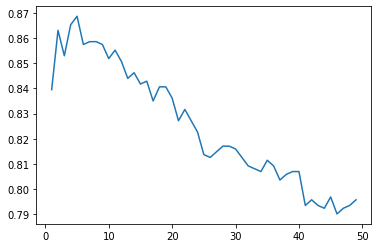

In [30]:
import matplotlib.pyplot as plt
k_score_pairings = {}
for k in range(1,50):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, Y_train)
    Y_pred = knn.predict(Test_data)
    acc_knn = knn.score(X_train, Y_train) #Calculate accuracy
    k_score_pairings[k] = acc_knn

%matplotlib inline
plt.plot(list(k_score_pairings.keys()), list(k_score_pairings.values()))
plt.show()

In [31]:
import operator
k = max(k_score_pairings.items(), key=operator.itemgetter(1))[0] #Grabs the max K with the max score
print(k)

knn = KNeighborsClassifier(n_neighbors = k)
knn.fit(X_train, Y_train)  #Fit training set to KNN with three centroids

5


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

## Viewing the prediction results

<p> Below is the resulting score of accuracy for the x training data trying to predict the y training data. Both of those datasets come from train_df.  </p>

In [32]:
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)  #Calculate accuracy, THIS IS JUST FOR THE X_TRAIN AND Y_TRAIN -
print(round(acc_knn,2,), "%")

86.87 %


<p> Below are the algorithims outputs for predictions. </p>

In [33]:
Y_pred = knn.predict(Test_data)  #Use KNN to predict survival
Y_pred #Can see the outputted predictions

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

## Introducing Random Forest

<p> A decision tree is the building block of a random forest and is an intuitive model. A single decision tree by itself is not that powerful, so that's where Random Forest comes into play. </p>

<p> Think of it this way, a single decision tree will have variance because it will be spread around the right answer, but each decision tree will be slightly or even vastly different. Now, what if we take predictions from hundreds or thousands of decision trees? I think you're getting the point. The fundamental idea behind a random forest is to combine many decision trees into a single model. </p>

<p> Each decision tree in the forest considers a random subset of features when forming questions and only has access to a random set of the training data points. That's where the "Random" part of the name comes from.  </p>

<p> When it comes time to make a classification, the random forest takes a majority vote of all predicted classes from the individual decision trees. </p> 

In [34]:
random_forest = RandomForestClassifier(n_estimators=100, criterion ='gini')
random_forest.fit(X_train, Y_train)  #Fit data to random forest

Y_prediction = random_forest.predict(Test_data)  #Have random forest predict for the Y dataset
Y_prediction

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

<p> Luckily, scikitlearn has a method to view the accuracy score of our fitted training data. </p>

In [35]:
print(random_forest.score(X_train, Y_train))
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2) #Calculate random forests accuracy
print(round(acc_random_forest,2,), "%") 

0.9236812570145904
92.37 %


### Exploring variable strength

<p> Random forest was able to map each variable to a tangible strength. And by judging the strength scores, they seem to make alot of sense. Sex, title, and age are the top three variables. Based on what we've learned in class, we know that the women on the titanic had an advantage of surviving and the same could be said about so the elderly. </p>

In [36]:
variable_strength = pd.DataFrame({'variable': X_train.columns, 'strength':random_forest.feature_importances_})
variable_strength = variable_strength.set_index('variable').sort_values('strength', ascending=False) #To see what variables hold weight
#not_alone holds no value
#We will drop that variable
variable_strength

,strength
variable,
Title,0.227272
Sex,0.161303
Age,0.132328
Deck,0.101236
Fare,0.087531
Pclass,0.086537
relatives,0.066898
Embarked,0.054686
SibSp,0.042444


## Adjust our inputs to Random Forest

<p> Since Random Forest was the stronger classifier, we will move forward with it as we adjusts our inputs. </p>

<p> Let's see what happens when we drop our three weakest metrics from our tables. As you can see the accuracy actually goes down. This is a task that would take more time to find the optimal number of variables and the optimal manipulation of variables. </p>

In [37]:
weak = ["not_alone", "Parch", "SibSp"]
for metric in weak:
    train_df  = train_df.drop(metric, axis=1) #Drop not_alone from both datasets
    test_df  = test_df.drop(metric,axis=1) ## Introducing Random Forestdrop("SibSp", axis=1)

In [38]:
X_train = train_df.drop("Survived", axis=1)  #Drop survived from x training set
Y_train = train_df["Survived"]  #Have y training set just be survived

test_pass_id = test_df['PassengerId']  #Assign to a new variable the test datasets passenger ID
Test_data  = test_df.drop("PassengerId", axis=1).copy()  #Drop Passenger ID as it was dropped in the training set

In [39]:
#RE RUN RANDOM FOREST WITHOUT NOT_ALONE
random_forest = RandomForestClassifier(n_estimators=100, oob_score = True)
random_forest.fit(X_train, Y_train)
Y_prediction = random_forest.predict(Test_data)

random_forest.score(X_train, Y_train)

acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
print(round(acc_random_forest,2,), "%")  #Print accuracy score

91.92 %


In [40]:
variable_strength = pd.DataFrame({'variable': X_train.columns, 'strength':random_forest.feature_importances_})
variable_strength = variable_strength.set_index('variable').sort_values('strength', ascending=False) #To see what variables hold weight
#not_alone holds no value
#We will drop that variable
variable_strength

,strength
variable,
Title,0.203974
Sex,0.185516
Age,0.138304
relatives,0.118995
Deck,0.111265
Fare,0.096760
Pclass,0.096501
Embarked,0.048685
